________________________________________________________________________________________________________________________


* Yuvraj Sutar 
* yuvrajsutar009@gmail.com
_ _________________________________________________________________________________________________________________________
_  _________________________________________________________________________________________________________________________


In [31]:
import numpy as np
import seaborn as sns
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
from sklearn.neighbors import KNeighborsRegressor


Read the dataset

In [48]:
data = pd.read_csv('C:\\Users\\Yuvraj\\Desktop\\Data Science\\kaggle\\Data\\advertising.csv')
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


information about the Dataset


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


Returns description of the data in the DataFrame.

In [34]:
data.describe() 

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


Returns the number of missing values in the dataset

In [35]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

Heatmap 

<AxesSubplot:>

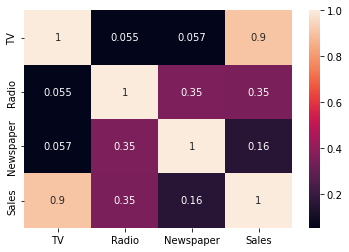

In [47]:
sns.heatmap(data.corr(),annot=True)

Split the data into training and testing sets

In [36]:
X = data.drop(['Sales'], axis=1)
y = data['Sales']

In [37]:
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [38]:
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

Let's see how Sales are related with other variables using scatter plot

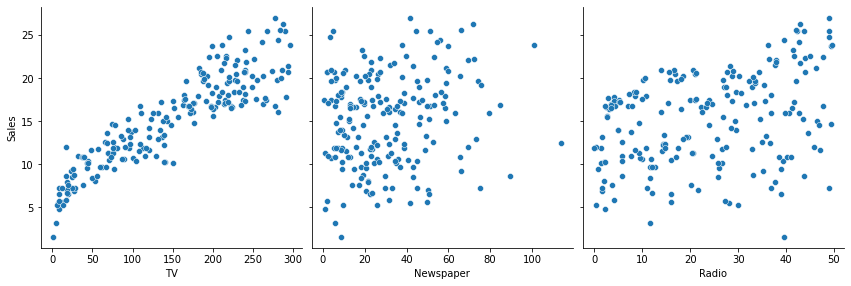

In [49]:

sns.pairplot(data, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

Split Data Into Training and Testing Sets

In [40]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2,random_state=11)
X_train

,TV,Radio,Newspaper
163,163.5,36.8,7.4
137,273.7,28.9,59.7
30,292.9,28.3,43.2
103,187.9,17.2,17.9
98,289.7,42.3,51.2
...,...,...,...
81,239.8,4.1,36.9
91,28.6,1.5,33.0
80,76.4,26.7,22.3
191,75.5,10.8,6.0


Fit a  regression model

In [41]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsRegressor()

Make predictions on the test set


In [42]:
y_pred = knn.predict(X_test)
y_pred

array([17.38, 20.14, 16.28, 11.9 ,  7.18, 18.56,  8.46,  7.48, 12.16,
       12.1 , 21.48, 12.34,  6.34, 16.58, 19.02, 12.94, 11.96,  9.4 ,
       20.54, 18.76,  7.88, 11.88, 11.44, 13.9 , 24.6 , 18.04, 12.9 ,
        7.84, 24.76, 16.52, 10.62, 10.4 , 18.02, 14.14, 21.94, 20.82,
       13.1 , 12.1 , 19.62, 15.9 ])

Calculate RMSE

In [50]:

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE:', rmse)

RMSE: 1.8137750687447438


To store rmse values for different k

In [52]:
value  = [] 
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    value.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 1.9385561637466169
RMSE value for k=  2 is: 1.7662814045332642
RMSE value for k=  3 is: 1.9120669444347391
RMSE value for k=  4 is: 1.939390206998066
RMSE value for k=  5 is: 1.8137750687447438
RMSE value for k=  6 is: 1.8791361786144662
RMSE value for k=  7 is: 1.8666337156955646
RMSE value for k=  8 is: 1.958098168504327
RMSE value for k=  9 is: 1.9692403122542985
RMSE value for k=  10 is: 2.020507980682086
RMSE value for k=  11 is: 2.0772657648580357
RMSE value for k=  12 is: 2.0773752302418123
RMSE value for k=  13 is: 2.132230823345275
RMSE value for k=  14 is: 2.12073641907326
RMSE value for k=  15 is: 2.1555334477675
RMSE value for k=  16 is: 2.1880195811509546
RMSE value for k=  17 is: 2.235728286008416
RMSE value for k=  18 is: 2.2367195514529423
RMSE value for k=  19 is: 2.25687960249682
RMSE value for k=  20 is: 2.275800545961794


In [45]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse


1.8137750687447438

* Yuvraj Sutar 
* yuvrajsutar009@gmail.com